# Maximum Likelihood as a linear regression problem


**Goal:** In this notebook you will learn how to calculate the maximum likelihood loss which is also the negative log likelihood, for an regression problem. You will define the negative log likelihood (NLL) loss function in Keras and use it to optimize the weights of a regression network. You will see that minimizing the NLL us the same as minimizing the mean squared error (MSE). You will learn that the optimal weights do not depend on $\sigma^2$  when you assume that the variance $\sigma^2$ is constant. In an second example you will try to minimize the NLL for 4 obervation pairs by changing $\mu$ and $\sigma^2$ with sliders and by using Tensorflow.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work with the systolic blood pressure and age data of 33 American women.

**Content:**
* define a function that calculates the density of a normal distribution at y given the parameters $\mu$ and  $\sigma^2$ (set to a constant value).  
* plot the density of a normal distribution at given point with given  $\mu$ and  $\sigma^2$
* define a the negative log likelihood as custom loss in Keras
* optimize the parameters for the blood pressure data with the negative log likelihood (NLL) loss in Keras
* see that the parameters does not depend on $\sigma^2$ 
* changing $\mu$ and $\sigma^2$ with sliders by hand to minimize the NLL
* use Tensorflow to optimize  $\mu$ and $\sigma^2$ automatically by minimizing the NLL


[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_04/nb_ch04_03.ipynb)

#### Imports

In [2]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow==2.0.0-alpha0  
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

tf.__version__

'2.0.0-alpha0'

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

Calculates the density $f(y,\mu,\sigma)$ of a normal distribution at $y$, given the parameters $\mu$ and $\sigma$ using:

$$
  f(y, \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y - \mu)^2}{2 \sigma^2}}
$$



In [0]:
def f(y, mu, sigma=20):
  return (1/(sigma * tf.math.sqrt(2 * np.pi)) * tf.math.exp( - (y - mu)**2 / (2 * sigma**2)))

Text(0, 0.5, 'probability density')

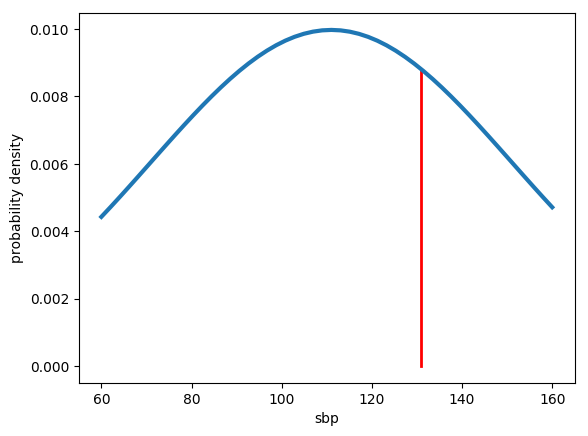

In [32]:
plt.style.use('default') 
sbp = np.linspace(60,160,50, dtype='float32')
plt.plot([131, 131], [0, f(131,111)], 'k-', lw=2,color='red')
plt.plot(sbp, f(sbp, 111),linewidth=3)
plt.xlabel('sbp')
plt.ylabel('probability density')

In [33]:
f(131, 111)

<tf.Tensor: id=2095971, shape=(), dtype=float32, numpy=0.008801633>

In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)
n = len(y)

Creating a custom loss function. In order to create a custom loss function in Keras. You have to follow the interface 
 `loss(y_true, y_pred)`.
 
Here we define the loss as follows:
$
    l = -\sum_{i=1}^n \log (f(y_i, a \cdot x+b)) =  -\sum_{i=1}^n \log(f(y_i, ypred_i)) 
$

In [0]:
# 10          20       30        40       50         55
#1234567890123456789012345678901234567890123456789012345

def my_loss(y_true,y_pred): #A
  loss = -tf.reduce_sum(tf.math.log(f(y_true,y_pred)))
  return loss

model = Sequential() #B
model.add(Dense(1, activation='linear', #B
                batch_input_shape=(None, 1)))
model.compile(loss=my_loss,optimizer="adam")

#A Definition of a custom loss function
#B Set up of a network being equivalent to linear regression. One linear activation and a bias term.
model.set_weights([[[0]],[100]])

In [36]:
for i in range(0,80000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 5000==0:
        mse=np.mean(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",mse)

#Should reach (you might need to do more iteration)
#1.   optimal value for slope: 1.1050216
#2.   optimal value for intercept: 87.67143
#3.   minimal MSE: 349.200787168560

Epoch: 0 slope= 0.0009999998 intercept= 100.001 MSE= 2161.8655
Epoch: 5000 slope= 0.8705217 intercept= 99.81014 MSE= 365.5486
Epoch: 10000 slope= 0.94754195 intercept= 95.837326 MSE= 356.59863
Epoch: 15000 slope= 1.030563 intercept= 91.53381 MSE= 350.85593
Epoch: 20000 slope= 1.0951815 intercept= 88.18189 MSE= 349.22974
Epoch: 25000 slope= 1.1050167 intercept= 87.67144 MSE= 349.20087
Epoch: 30000 slope= 1.1050221 intercept= 87.67142 MSE= 349.20087
Epoch: 35000 slope= 1.1050217 intercept= 87.671425 MSE= 349.20084
Epoch: 40000 slope= 1.105018 intercept= 87.671425 MSE= 349.2008
Epoch: 45000 slope= 1.1050216 intercept= 87.671425 MSE= 349.2008
Epoch: 50000 slope= 1.1050225 intercept= 87.67142 MSE= 349.20087
Epoch: 55000 slope= 1.1050214 intercept= 87.67142 MSE= 349.2009
Epoch: 60000 slope= 1.1050217 intercept= 87.671425 MSE= 349.20084
Epoch: 65000 slope= 1.105021 intercept= 87.671425 MSE= 349.2008
Epoch: 70000 slope= 1.1050222 intercept= 87.671425 MSE= 349.20087
Epoch: 75000 slope= 1.105021

### Independence of sigma

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Change the value of sigma in the calculation of the likelihood. Does the result depend on it?

### 2 Optimizing Sigma



In [20]:
!pip install ipywidgets

In [21]:
from ipywidgets import interactive
plt.figure(figsize=(5,5))
ys=np.array([131,105,114,117], dtype='float32')
sbp = np.linspace(80,140,200, dtype='float32')

def make_interactive(mu, sigma):
    likelihoods = f(ys, mu,sigma)
    for i in range(4):
        plt.plot([ys[i], ys[i]], [0, likelihoods[i]], 'k-', lw=1,color='red') 
    plt.plot(sbp, f(sbp, mu,sigma),linewidth=3)
    plt.xlabel('sbp')
    plt.ylabel('likelihood')
    plt.title('NLL: {:.2f}'.format(-np.sum(np.log(likelihoods))))

interactive(make_interactive,mu=(90, 130, 1), sigma=(2,20,1))

interactive(children=(IntSlider(value=110, description='mu', max=130, min=90), IntSlider(value=11, description…

<Figure size 500x500 with 0 Axes>

#### Note TODO After release of TF 2.0

Needs some inverstigation. How to do this the TF2.0 way after the release.

In [0]:
mu     = tf.Variable(10.0)
sigma =  tf.Variable(124.0)
variables = [mu,sigma]
#eta = 0.0004
#likelihoods = f(ys, mu,sigma)
#loss = -tf.math.reduce_sum(tf.math.log(likelihoods)) 
optimizer = tf.optimizers.Adam()


In [25]:
for i in range(2000):
  with tf.GradientTape() as tape: #Record the gradients from now on
    likelihoods = f(ys, mu,sigma)
    loss = -tf.math.reduce_sum(tf.math.log(likelihoods))
    grads = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(grads, variables))
    #grad_mu, grad_sigma  = tape.gradient(loss, [mu,sigma])
    #mu = tf.Variable(mu - eta * grad_mu)
    #sigma = tf.Variable(sigma - eta * grad_sigma)

    if (i % 200 == 0):
      print("Epoch:",i, "slope=",mu.numpy(),"intercept=",sigma.numpy(), "mse=", loss.numpy())

Epoch: 0 slope= 14.017714 intercept= 119.960205 mse= 24.303345
Epoch: 200 slope= 14.218939 intercept= 119.75726 mse= 24.29583
Epoch: 400 slope= 14.420204 intercept= 119.55432 mse= 24.288298
Epoch: 600 slope= 14.62162 intercept= 119.35138 mse= 24.280748
Epoch: 800 slope= 14.823036 intercept= 119.14844 mse= 24.273186
Epoch: 1000 slope= 15.024452 intercept= 118.945496 mse= 24.26561
Epoch: 1200 slope= 15.225868 intercept= 118.74255 mse= 24.258018
Epoch: 1400 slope= 15.427284 intercept= 118.53961 mse= 24.250414
Epoch: 1600 slope= 15.6287 intercept= 118.33667 mse= 24.242796
Epoch: 1800 slope= 15.830116 intercept= 118.13373 mse= 24.23516
